# Exploring Movie Features

We wanted to see the distributions of different factors with star-rating and metascore as well as general trends in movies overall. We obtained this data from 3 different pages of imdb: the top 250, bottom 250, and 300 medicore movies. We complied all this data together into one and created a dataframe that is in the csv below. 

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df_movies = pd.read_csv("/content/drive/My Drive/DATA 301/movies.csv")

# Visualizations

### Directors Across Movie Types

The 3 plots below show the top 10 directors for each type: good, bad, mediocre. We can see in these plots that the top 10 directors for each of these types of movies vary. We chose to do the top 10 for each movie type since there were many other directors and we only wanted to see the top 10. 

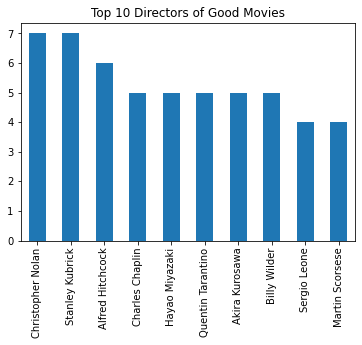

In [0]:
df_good = df_movies[df_movies["types"]== "good"]
df_good["director"].value_counts().nlargest(10).plot.bar(
    title = "Top 10 Directors of Good Movies"
)

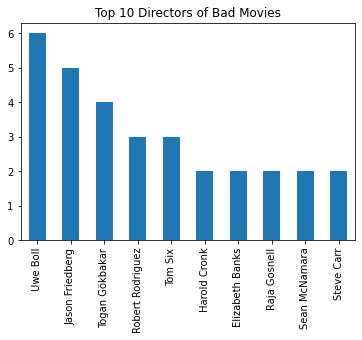

In [0]:
df_bad= df_movies[df_movies["types"] == "bad"]
df_bad["director"].value_counts().nlargest(10).plot.bar(
     title = "Top 10 Directors of Bad Movies"
)

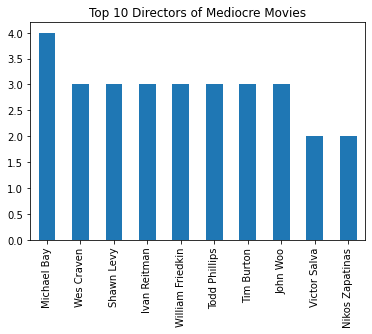

In [0]:
df_mediocre = df_movies[df_movies["types"] == "med"]
df_mediocre["director"].value_counts().nlargest(10).plot.bar(
     title = "Top 10 Directors of Mediocre Movies"
)

### Distribution of Movies Across Years

This is a plot of the top 25 years that had movies made in either the top 250, bottom 250, and middle 300. We can see that there were more movies listed in the 2005-2010 then from other years. We chose to do the top 25 years since there are too many years in the dataset, and we only wanted to see the top 25. 

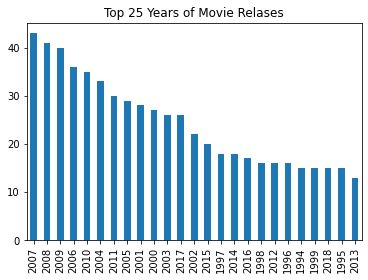

In [0]:
df_movies["year"].value_counts().nlargest(25).plot.bar(
    title = "Top 25 Years of Movie Relases"
)

### Runtime Across Movie Types

We seperated the types of movies into seperate dataframes to compare the differences in specific features. In the plot below, we can see that the runtime trend of the types of movies differ in that bad movies tend to have a lower run time in comparison with the good and mediocre movies. 

In [0]:
good = df_good["runtime"]
bad = df_bad["runtime"]
medicore = df_mediocre["runtime"]

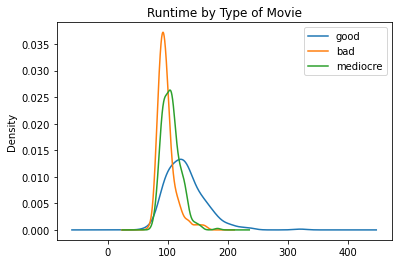

In [0]:
good.plot.density(label = "good", legend = True, title = "Runtime by Type of Movie")
bad.plot.density(label = "bad", legend = True)
medicore.plot.density(label = "mediocre", legend = True)

We wanted to predict metascore and star-rating based on certain features, and wanted to plot graphs by movie type: good, bad, mediocre in order to see which features seemed to have a relationship with these response variables. 

Since there appears to be a difference in run time based on the type of movie, we wanted to compare runtime with metascore and star-rating since these are the variables we are predicting in the machine learning portion. We used a package called seaborn and plotted scatterplots where we could see the relationship between the features categorized by the type of movie. Based on the points, we can see that the metascore is more widely distributed across the types in commpairson with star-rating. Based on the regression lines of each type, we can also see that runtime does not have much correlation with both metascore and star-rating across any movie type. 

Text(0.5, 0.98, 'Runtime vs. Metascore')

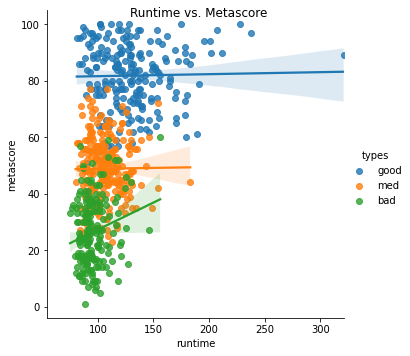

In [0]:
sns.lmplot(x = "runtime", y = "metascore", data = df_movies, hue = "types").fig.suptitle("Runtime vs. Metascore")

Text(0.5, 0.98, 'Runtime vs. Star-Rating')

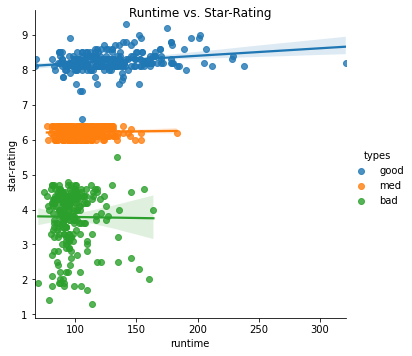

In [0]:
sns.lmplot(x = "runtime", y = "star-rating", data = df_movies, hue = "types").fig.suptitle("Runtime vs. Star-Rating")

### Rating Across Movie Types

When we compare the types of movies across rating, we can see that rated R movies were the most in production closely followed by PG-13 for the bad and mediocre types. However, we do not see any clear trend between the type of movie and which genre the movie is. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


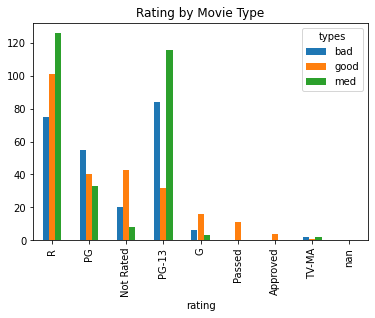

In [0]:
plot = df_movies.groupby(['rating', 'types']).size().unstack()
plot.loc[["R","PG","Not Rated","PG-13","G","Passed","Approved","TV-MA", "nan"]].plot(
    kind = "bar", 
    title = "Rating by Movie Type")

### Votes Across Movie Types

We also wanted to compare star-rating and metascore with votes to see if the number of votes had a positive or negative impact on the rating given by both the critic and the user. We can see that the regression lines for each of the type of movies has a slope which indicates that there is a relationship between these variables. In general, it appaears that the more votes a movie received, the higher the star-rating or metascore would be. 

Text(0.5, 0.98, 'Votes vs. Star-Rating')

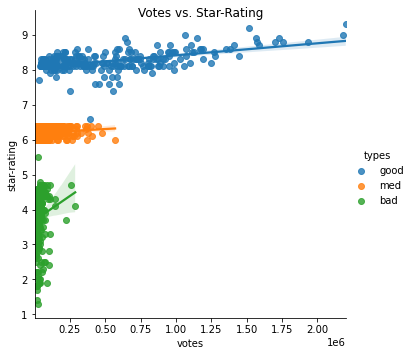

In [0]:
sns.lmplot(x = "votes", y = "star-rating", data = df_movies, hue = "types").fig.suptitle("Votes vs. Star-Rating")

Text(0.5, 0.98, 'Votes vs. Metascore')

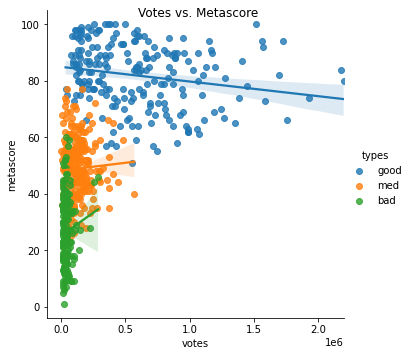

In [0]:
sns.lmplot(x = "votes", y = "metascore", data = df_movies, hue = "types").fig.suptitle("Votes vs. Metascore")

### Relatioship Between Our 2 Response Variables

Lastly, we wanted to see if there was any relationship between metascore and star-rating. Based on this plot, we can see that there is not much of a trend besides the bad movie type. We can see the clear distinction between the groups in that good movies had both a high metascore and star-rating while bad movies had both a low metascore and low star-rating. 

Text(0.5, 0.98, 'Metascore vs. Star-rating')

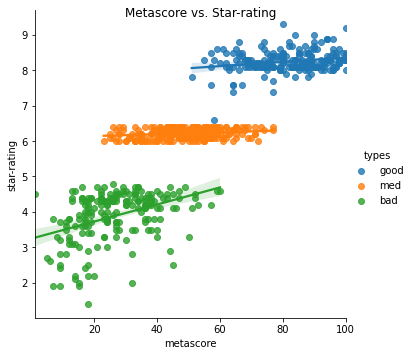

In [0]:
sns.lmplot(x = "metascore", y = "star-rating", data = df_movies, hue = "types").fig.suptitle("Metascore vs. Star-rating")

Based off the visualizations, we can see that 


*   There appears to be a difference for directors since the top 10 directors for each movie group was different
*   Movie runtime appears to be significant in that there is a clear difference in runtime by the movie types. 
*   The number of votes seem to have an effect on metascore and star-rating

